In [1]:
from pathlib import Path

import pandas as pd

In [2]:
DATA_PATH = Path('../data/')

# Load data

In [3]:
# Load
df = pd.read_csv(DATA_PATH / 'train.csv', index_col='line_id')

# Preprocess
df['answer'] = df['answer'].str.slice(stop=500)

# Display
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   summary           1050 non-null   object
 1   question          1050 non-null   object
 2   answer            1050 non-null   object
 3   is_hallucination  1050 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 41.0+ KB


None

,summary,question,answer,is_hallucination
line_id,,,,
0,Херманус Питер (Дик) Логгере (нидерл. Hermanus...,В каком городе проходил чемпионат мира по хокк...,В Хилверсюме.,1
1,Ходуткинские горячие источники (Худутские горя...,Как называется район в который входят источники?,Елизовским районом,0
2,Чёрная вдова (лат. Latrodectus mactans) — вид ...,Для кого опасны пауки-бокоходы?,Для рыб.,1
3,"Рысь — река в России, протекает по территориям...",Какова длина реки Рысь?,5 км.,1
4,"И́се (яп. 伊勢市), ранее Удзиямада — город в Япон...",Что такое Исе?,"Исе — это небольшой город в Японии, который не...",1


## Class balance

In [4]:
df['is_hallucination'].value_counts()

is_hallucination
1    532
0    518
Name: count, dtype: int64

## Length distribution

line_id
205       41
199       47
153       58
1027      58
119       60
        ... 
50      2048
225     2048
813     2048
96      2048
47      2048
Name: summary, Length: 1050, dtype: int64

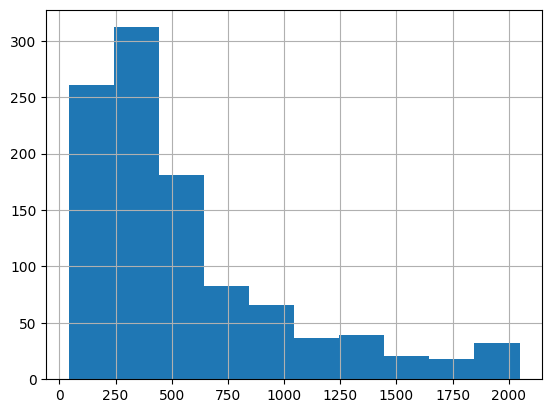

In [5]:
df['summary'].str.len().hist()
df['summary'].str.len().sort_values()

line_id
212      6
387     11
506     11
278     11
371     11
      ... 
583    106
392    111
565    130
111    156
775    167
Name: question, Length: 1050, dtype: int64

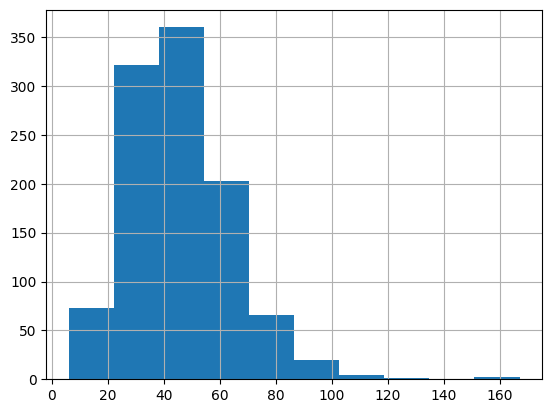

In [6]:
df['question'].str.len().hist()
df['question'].str.len().sort_values()

line_id
306      1
668      1
791      1
383      1
961      1
      ... 
496    374
391    380
966    382
192    464
899    500
Name: answer, Length: 1050, dtype: int64

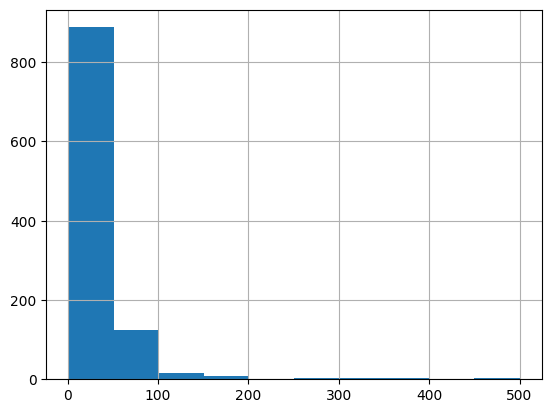

In [7]:
df['answer'].str.len().hist()
df['answer'].str.len().sort_values()

## Some checks

In [8]:
df['question'].loc[df['question'].str.len() < 12]

line_id
81     Как её имя?
212         Каким?
278    Где он жил?
365    Где родился
371    Кто он был?
387    Где родился
395    Где родился
506    Где родился
653    Его работы?
Name: question, dtype: object

In [9]:
df['answer'].loc[df['answer'].str.len() < 5]

line_id
18         4
23      1958
27      1966
31      2001
43      2009
        ... 
1012      22
1026    1908
1034     182
1035     188
1043      4%
Name: answer, Length: 122, dtype: object